In [1]:
import numpy as np
import torch
import cv2
import matplotlib.pyplot as plt
import os
import multiprocessing as mp
import seaborn as sns

from code.models import basicunet, resnetunet
from code.datasets import TGSTTADataset
from code.configs import *
from code.train import *
from code.losses import FocalRobustLoss
from code.metrics import *
from code.augmentations import *
from code.utils import *
from torch.utils.data import DataLoader
from IPython.display import clear_output
from code.inference import *

%matplotlib inline

In [2]:
dirs = ["../resnet32_256/test1/logits/", "../resnet32_256/test2/logits/", 
        "../resnet32_256/test3/logits/", "../resnet32_256/test4/logits/", 
        "../resnet32_256/test5/logits/"]
logits, ids = [], []

for name in os.listdir(dirs[0]):
    name = name.split(".")[0]
    id_ = name.split("_")[0]
    ids.append(id_)
    
ids = sorted(list(set(ids)))

In [ ]:
for id_ in tqdm_notebook(ids):
    logit_list = []
    for dirname in dirs:
        suffix = ""
        name = id_ + suffix + ".npy"
        path = os.path.join(dirname, name)
        logit = np.load(path)
        logit_list.append(logit)
        
        suffix = "_flipped"
        name = id_ + suffix + ".npy"
        path = os.path.join(dirname, name)
        logit = np.load(path)
        logit = logit[:,::-1]
        logit_list.append(logit)
        
    logit = np.mean(np.array(logit_list), axis=0)
    logit = logit[27:-27,27:-27]
    logit = cv2.resize(logit, dsize=(101, 101))
    logits.append(logit)
logits = np.array(logits)

In [ ]:
import pickle
np.save("logits", logits)
with open("ids.pkl", "wb") as f:
    pickle.dump(ids, f)

In [ ]:
!sudo poweroff

In [6]:
import pickle
logits = np.load("logits.npy")
with open("../resnet32_256/ids.pkl", "rb") as f:
    ids = pickle.load(f)

In [ ]:
logits.shape, len(ids)

In [ ]:
def sigmoid(x):
    return 1. / (1. + np.exp(-x))

In [ ]:
probs = sigmoid(logits)

In [ ]:
preds = (probs > 0.5).astype(int)

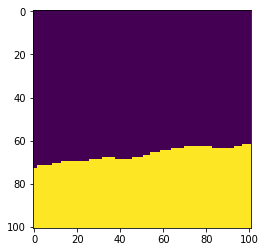

In [43]:
plt.imshow(preds[-10101])

In [3]:
ids[-10101]

'a0b00e7922'

In [ ]:
for p, id_ in zip(preds, ids):
    target_name = "{}.png".format(id_)
    src_name = os.path.join(PATH_TO_TEST, "images", target_name)
    cv2.imwrite(os.path.join("./test_pl/masks/", target_name), 255 * p)
    os.link(src_name, os.path.join("./test_pl/images/", target_name))

In [ ]:
mask = read_mask("./test_pl/masks/e093696fc6.png")
image = read_image("./test_pl/images/e093696fc6.png")

In [ ]:
plt.imshow(mask)

In [ ]:
plt.imshow(image)